### Setup

In [1]:
# ----------------------- #
# NOTEBOOK MPI EXPERIMENT #
# AUTHOR: XIAOYANG SONG   #
# ----------------------- #
%load_ext autoreload
%autoreload 2

In [8]:
import sys
from tabulate import tabulate
sys.path.append('../../')
from MPI.mpi import *

### BERT

In [2]:
from transformers import AutoTokenizer, RobertaModel
import torch

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [21]:
ic(outputs.last_hidden_state.shape)

ic| outputs.last_hidden_state.shape: torch.Size([1, 8, 768])


torch.Size([1, 8, 768])

In [81]:
from transformers import AutoTokenizer, RobertaForCausalLM, AutoConfig, AlbertForPreTraining
import torch

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")
# config = AutoConfig.from_pretrained("roberta-base")
# config.is_decoder = False
# config.is_decoder=True

# model = BertLMHeadModel.from_pretrained("bert-base-uncased")
# model = RobertaForCausalLM.from_pretrained("roberta-base")
model = AlbertForPreTraining.from_pretrained("albert-base-v2")

inputs = tokenizer("Hello Hello World.\nAnswer: (A). Hello!", return_tensors="pt")
choice = tokenizer("(A). Very Inaccurate", return_tensors='pt')
ic(len(choice.input_ids[0,1:-1]))
ic(tokenizer.decode(choice.input_ids[0]))
ic(tokenizer.decode(choice.input_ids[0][1:-1]))
# inputs = tokenizer("Hello, my dog is cute, I love dog", return_tensors="pt")
ic(inputs)
ic(inputs.input_ids.shape)
ic(tokenizer.decode(inputs.input_ids[0][-8:-1]))
outputs = model(**inputs)
# prediction_logits = outputs.logits
prediction_logits = outputs.prediction_logits

Some weights of AlbertForPreTraining were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
ic| len(choice.input_ids[0,1:-1]): 7
ic| tokenizer.decode(choice.input_ids[0]): '[CLS] (a). very inaccurate[SEP]'
ic| tokenizer.decode(choice.input_ids[0][1:-1]): '(a). very inaccurate'
ic| inputs: {'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
             'input_ids': tensor([[    2, 10975, 10975,   126,     9,  1623,    45,    13,     5,    58,
                         6,     9, 10975,   187,     3]]),
             'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}
ic| inputs.input_ids.shape: torch.Size([1, 15])
ic| tokenizer.decode(inputs.input_ids[0][-8:-1]): '(a). hello!'


In [ ]:
for item in inputs.input_ids[0]:
    ic(tokenizer.decode(item))

In [79]:
ic(prediction_logits.squeeze().shape)
ic(inputs.input_ids[0].shape)
prob = torch.softmax(prediction_logits.squeeze(), dim=-1)
ic(prob.shape)
masked_prob = prob[np.arange(inputs.input_ids[0].shape[0]), inputs.input_ids[0]]
ic(masked_prob.shape)
ic(masked_prob)
idx = torch.max(prob, dim=-1)[1]
ic(idx)
ic(tokenizer.decode(idx))

ic| prediction_logits.squeeze().shape: torch.Size([15, 30000])
ic| inputs.input_ids[0].shape: torch.Size([15])
ic| prob.shape: torch.Size([15, 30000])
ic| masked_prob.shape: torch.Size([15])
ic| masked_prob: tensor([4.7897e-09, 9.9919e-01, 9.8371e-01, 6.8068e-01, 9.4952e-01, 9.9545e-01,
                         9.9918e-01, 8.3858e-01, 1.0000e+00, 9.6725e-01, 9.9983e-01, 9.3254e-01,
                         9.4908e-01, 6.5884e-01, 3.2223e-04], grad_fn=<IndexBackward0>)
ic| idx: tensor([  187, 10975, 10975,   126,     9,  1623,    45,    13,     5,    58,
                     6,     9, 10975,   187,   154])
ic| tokenizer.decode(idx): '! hello hello world. answer: (a). hello! your'


'! hello hello world. answer: (a). hello! your'

ic| eg.shape: torch.Size([50265])
ic| tokenizer.decode([idx]): 'Hello'


'Hello'

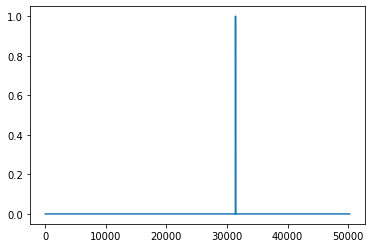

In [30]:
eg = prob[1]
ic(eg.shape)
plt.plot(np.arange(len(eg)), eg.detach().cpu())
idx = torch.argmax(eg)
ic(tokenizer.decode([idx]))

### GPT (Constraint)

In [32]:
from transformers import OpenAIGPTTokenizer, OpenAIGPTLMHeadModel
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import numpy as np
from icecream import ic
import torch

In [46]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
inputs = tokenizer("Hello Hello World.\nAnswer: (A). Very Inaccurate", return_tensors="pt")
choice = tokenizer("(A). Very Inaccurate", return_tensors='pt')
ic(len(choice.input_ids[0,:]))
ic(tokenizer.decode(choice.input_ids[0]))
ic(tokenizer.decode(choice.input_ids[0]))
# inputs = tokenizer("Hello, my dog is cute, I love dog", return_tensors="pt")
ic(inputs)
ic(tokenizer.decode(inputs.input_ids[0][-7:]))
outputs = model(**inputs, labels=inputs.input_ids)

prediction_logits = outputs.logits
ic(prediction_logits.shape)

ic| len(choice.input_ids[0,:]): 7
ic| tokenizer.decode(choice.input_ids[0]): '(A). Very Inaccurate'
ic| tokenizer.decode(choice.input_ids[0]): '(A). Very Inaccurate'
ic| inputs: {'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
             'input_ids': tensor([[15496, 18435,  2159,    13,   198, 33706,    25,   357,    32,   737,
                      9576,   554,  4134, 15537]])}
ic| tokenizer.decode(inputs.input_ids[0][-7:]): ' (A). Very Inaccurate'
ic| prediction_logits.shape: torch.Size([1, 14, 50257])


torch.Size([1, 14, 50257])

In [47]:
probs = torch.softmax(prediction_logits, dim=-1)
ic(probs.shape)

ic| probs.shape: torch.Size([1, 14, 50257])


torch.Size([1, 14, 50257])

In [49]:
from matplotlib import pyplot as plt
print("Hello Hello World.\nAnswer: (A). Very Inaccurate")
eg = probs[0][0]
ic(eg.shape)
plt.plot(np.arange(len(eg)), eg.detach().cpu())
idx = torch.argmax(eg)
ic(idx)
ic(tokenizer.decode([idx]))

ic| eg.shape: torch.Size([50257])


Hello Hello World.
Answer: (A). Very Inaccurate


ic| idx: tensor(11)
ic| tokenizer.decode([idx]): ','


','

In [61]:
import torch
from transformers import AutoTokenizer, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs, labels=inputs["input_ids"])
loss = outputs.loss
logits = outputs.logits
ic(-loss)
ic(logits.shape)

ic| -loss: tensor(-3.9902, grad_fn=<NegBackward0>)
ic| logits.shape: torch.Size([1, 6, 50257])


torch.Size([1, 6, 50257])

In [67]:
ic(logits.shape)
idxs = torch.argmax(logits.squeeze(), dim=-1)
probs = torch.softmax(logits.squeeze(), dim=-1)[np.arange(6), inputs.input_ids[0]]
ic(probs.shape)
ic(torch.sum(torch.log(probs)))
ic(idxs)
print(tokenizer.decode(idxs))
print(tokenizer.decode(inputs.input_ids[0]))

ic| logits.shape: torch.Size([1, 6, 50257])
ic| probs.shape: torch.Size([6])
ic| torch.sum(torch.log(probs)): tensor(-53.3722, grad_fn=<SumBackward0>)
ic| idxs: tensor([  11,  314, 1438,  318,  257,   13])


, I name is a.
Hello, my dog is cute


### GPT (Open Vocab)

#### GPT-2

In [7]:
from Model.language_model import *
from Model.template import *
# version = 'gpt2'
version = 'gpt2-large'
tokenizer = TOKENIZER['GPT2'].from_pretrained(version)
model = MODEL['GPT2'].from_pretrained(version, pad_token_id=tokenizer.eos_token_id)
with torch.no_grad():
    # Text completion
    item = "worry about things"
    eg_q = MPI_TEMPLATE.format(item=item) + ordered_lst_to_str(MPI_DESC)
    # # print(eg_q)
    inputs = tokenizer(eg_q, return_tensors='pt')
    input_ids = inputs.input_ids
    response = model.generate(input_ids, do_sample=True, top_p=0.95, temperature=0.1,
                                    num_return_sequences=1, early_stopping=True, max_new_tokens=10)
    output = tokenizer.decode(response[0])
print(output)
print(len(response[0]))

Given a statement of you: "You worry about things."
Please choose from the following options to identify how accurately this statement describes you.
Options: 
Very Accurate 
Moderately Accurate 
Neither Accurate Nor Inaccurate 
Moderately Inaccurate 
Very Inaccurate 

Answers: 

Very Accurate

Moderately
83


#### GPT-3

In [16]:
import openai
from util.utils import *
from icecream import ic
set_seed(2023)
# Make sure to redirect to the correct path
# I don't know why but it shows that Kiyan's api key is not correct.
# openai.api_key = read_api_key("../../", 'kiyan')
openai.api_key = read_api_key("../../", 'xysong')
# eg_q = "Please use a word to describe yourself."
item = "worry about things"
eg_q = MPI_TEMPLATE.format(item=item) + ordered_lst_to_str(MPI_DESC)
response = openai.Completion.create(engine="text-davinci-002", prompt=eg_q, temperature=0.1, max_tokens=100, top_p=0.95, logprobs=1)
# print(response['choices'][0]['text'])
# print(response)

In [ ]:
response

In [9]:
from Model.language_model import *
from Model.template import *
item = "worry about things"
eg_q = MPI_TEMPLATE.format(item=item) + ordered_lst_to_str(MPI_DESC)
print(eg_q)

Given a statement of you: "You worry about things."
Please choose from the following options to identify how accurately this statement describes you.
Options: 
Very Accurate 
Moderately Accurate 
Neither Accurate Nor Inaccurate 
Moderately Inaccurate 
Very Inaccurate 

Answers: 
